In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 
                'axes.axisbelow': True, 'axes.facecolor': '#F2F2F2', 'axes.grid': False, 'grid.color': 'grey', 
               'grid.linestyle': '--', 'xtick.color': '.10', 'ytick.color': '.10', 'axes.labelcolor': '.10', 'axes.linewidth': 0.1})

# Cause plots to be displayed in the notebook:#F2F2F2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Read csv file

In [3]:
df = pd.read_csv('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Data Files/Vic_crash_final.csv')

In [4]:
df.head()

accident_no   date     time time_desc  mon  year  e_no  \
0  T20150000004  42005  2:10:00     Night  Jan  2015     2   
1  T20150000005  42005  0:31:00     Night  Jan  2015     4   
2  T20150000008  42005  0:10:00     Night  Jan  2015     1   
3  T20150000011  42005  1:15:00     Night  Jan  2015     6   
4  T20150000014  42005  7:30:00   Morning  Jan  2015     8   

                 event_type  day  no_veh  ...              rd_geom  speed  \
0         Struck Pedestrian  Thu       1  ...  Not at intersection     60   
1  Collision : fixed object  Thu       1  ...  Not at intersection     50   
2        Collision: vehicle  Thu       2  ...  Not at intersection    100   
3        Vehicle overturned  Thu       1  ...  Not at intersection    100   
4              No collision  Thu       1  ...  Not at intersection    100   

                   road_01          type_01           road_02  type_02  \
0        Mt Alexander Road             Road      South Street   Street   
1           The Boulevard         Boulevard     Kagoola Court    Court   
2             Andrews Road             Road       Mcewen Road     Road   
3  Cobden-Warrnambool Road             Road       Craigs Lane     Lane   
4    Murray Valley Highway  Highway/Freeway  North South Road     Road   

             lga             region   latitude   longitude  
0  Moonee Valley    Melbourne Urban -37.779229  144.930941  
1        Geelong  Large Prov Cities -38.095632  144.347208  
2     Shepparton     Rural Victoria -36.372313  145.035110  
3          Moyne     Rural Victoria -38.396728  142.753880  
4      Swan Hill     Rural Victoria -35.221766  143.458742  

[5 rows x 57 columns]

In [5]:
df.shape

(77187, 57)

In [6]:
df.columns

Index(['accident_no', 'date', 'time', 'time_desc', 'mon', 'year', 'e_no',
       'event_type', 'day', 'no_veh', 'no_per', 'ser_inj', 'oth_inj', 'fatal',
       'no_inj', 'sev_no', 'fem', 'male', '0-15', '16-30', '31-45', '46-60',
       '61-75', '75+', 'bicy', 'driv', 'mcyc', 'pass', 'ped', 'pi_p', 'rid',
       'o_dri', 'y_dri', 'f_dri', 'm_dri', 'o_fd', 'o_md', 'y_fd', 'y_md',
       '2-whe', 'h_veh', 'horse', 'm_pass', 'l_pass', 'unk', 'ute', 'rg_no',
       'rd_geom', 'speed', 'road_01', 'type_01', 'road_02', 'type_02', 'lga',
       'region', 'latitude', 'longitude'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77187 entries, 0 to 77186
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   accident_no  77187 non-null  object 
 1   date         77187 non-null  int64  
 2   time         77187 non-null  object 
 3   time_desc    77187 non-null  object 
 4   mon          77187 non-null  object 
 5   year         77187 non-null  int64  
 6   e_no         77187 non-null  int64  
 7   event_type   77187 non-null  object 
 8   day          77187 non-null  object 
 9   no_veh       77187 non-null  int64  
 10  no_per       77187 non-null  int64  
 11  ser_inj      77187 non-null  int64  
 12  oth_inj      77187 non-null  int64  
 13  fatal        77187 non-null  int64  
 14  no_inj       77187 non-null  int64  
 15  sev_no       77187 non-null  int64  
 16  fem          77187 non-null  int64  
 17  male         77187 non-null  int64  
 18  0-15         77187 non-null  int64  
 19  16-3

## Change data type

In [8]:
df.date = pd.to_datetime(df.date)
df = df.astype({'year' : 'str', 'e_no' : 'category', 'sev_no' : 'category', 'rg_no' : 'category', 'speed' : 'category'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77187 entries, 0 to 77186
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   accident_no  77187 non-null  object        
 1   date         77187 non-null  datetime64[ns]
 2   time         77187 non-null  object        
 3   time_desc    77187 non-null  object        
 4   mon          77187 non-null  object        
 5   year         77187 non-null  object        
 6   e_no         77187 non-null  category      
 7   event_type   77187 non-null  object        
 8   day          77187 non-null  object        
 9   no_veh       77187 non-null  int64         
 10  no_per       77187 non-null  int64         
 11  ser_inj      77187 non-null  int64         
 12  oth_inj      77187 non-null  int64         
 13  fatal        77187 non-null  int64         
 14  no_inj       77187 non-null  int64         
 15  sev_no       77187 non-null  category      
 16  fem 

## Top region

In [13]:
df_lga = df[['accident_no', 'road_01', 'type_01', 'road_02', 'type_02', 'lga', 'region', 'sev_no', 'latitude', 'longitude']]

In [14]:
df_lga.head()

accident_no                  road_01          type_01           road_02  \
0  T20150000004        Mt Alexander Road             Road      South Street   
1  T20150000005           The Boulevard         Boulevard     Kagoola Court   
2  T20150000008             Andrews Road             Road       Mcewen Road   
3  T20150000011  Cobden-Warrnambool Road             Road       Craigs Lane   
4  T20150000014    Murray Valley Highway  Highway/Freeway  North South Road   

  type_02            lga             region sev_no   latitude   longitude  
0  Street  Moonee Valley    Melbourne Urban      3 -37.779229  144.930941  
1   Court        Geelong  Large Prov Cities      2 -38.095632  144.347208  
2    Road     Shepparton     Rural Victoria      1 -36.372313  145.035110  
3    Lane          Moyne     Rural Victoria      2 -38.396728  142.753880  
4    Road      Swan Hill     Rural Victoria      3 -35.221766  143.458742

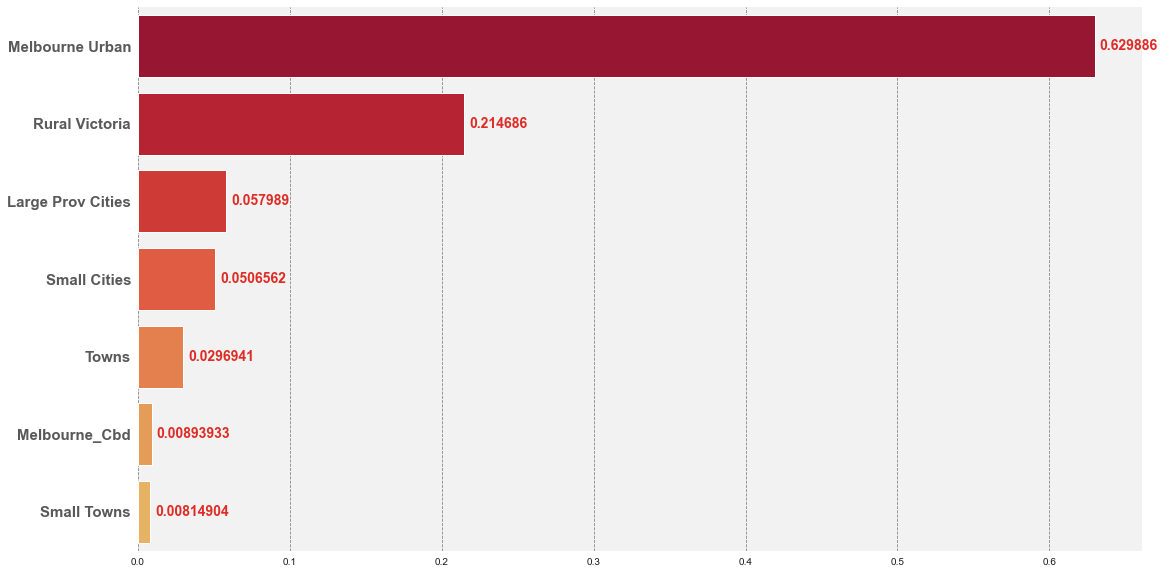

In [15]:
plt.figure(figsize=(18,10))
colour = sns.color_palette('YlOrRd_r', 10)
bar_region = df_lga.region.value_counts(normalize=True)

bar_region1 = sns.barplot(x= bar_region.values, y=bar_region.index, palette=colour)
sns.despine(left=True, bottom=True)
bar_region1.grid(axis='x')

bar_region1.bar_label(bar_region1.containers[0], fontsize=14, color='#de2d26', fontweight='bold', padding= 5)
_, ylabels = plt.yticks()
bar_region1.set_yticklabels(ylabels, fontsize=15, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/regions_dist.png')
plt.show()

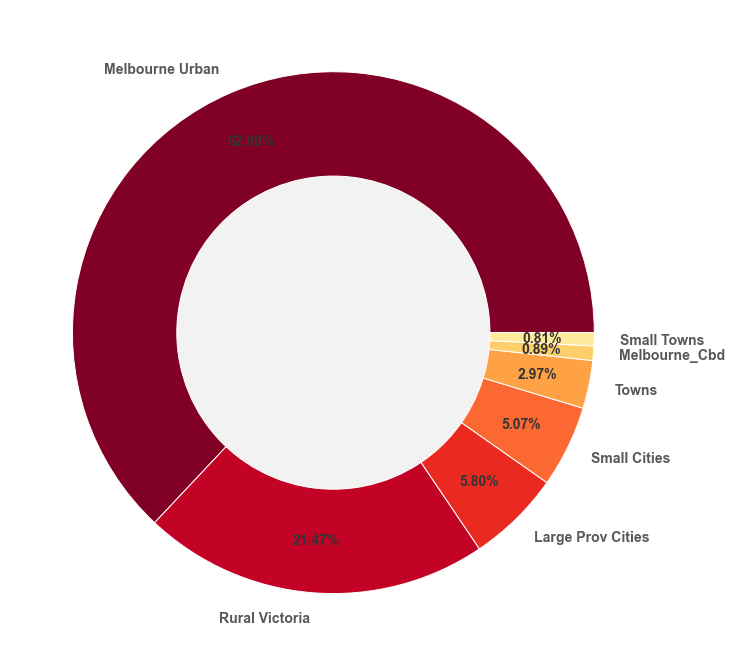

In [16]:
#Using matplotlib

cs=cm.YlOrRd_r(np.arange(7)/7.)
bar_region = df_lga.region.value_counts(normalize=True)

pie, ax = plt.subplots(figsize=(12,12))
labels = bar_region.index
patches, texts, autotexts = ax.pie(x=(bar_region), autopct="%.2f%%", labels=labels, pctdistance=0.8, 
                                   colors=cs, startangle=0, textprops={'fontsize': 14, "fontweight" :'bold'})

for text in texts:
    text.set_color('#595959')
for autotext in autotexts:
    autotext.set_color('#343434')
    
centre_circle = plt.Circle((0,0),0.60,fc='#F2F2F2')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/regions_pie.png')
plt.show()

## Top Lga

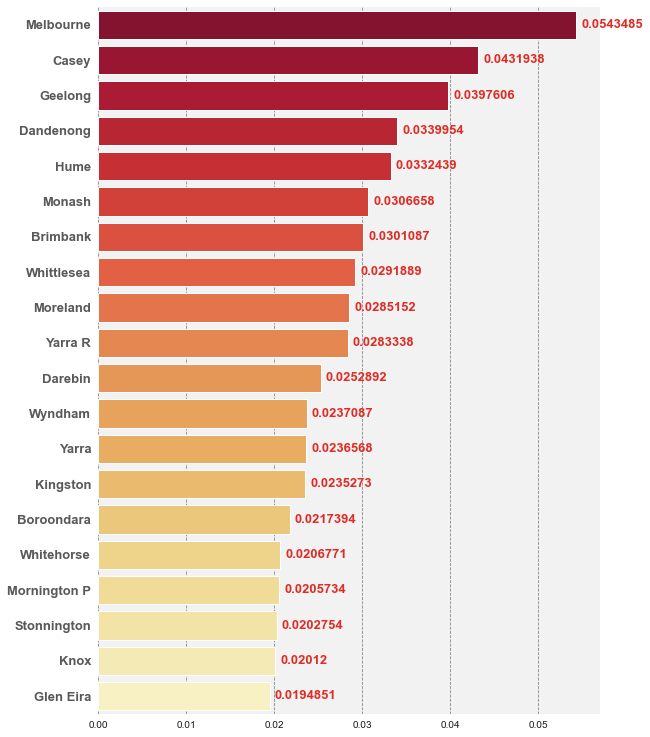

In [17]:
plt.figure(figsize=(9,13))
colour1 = sns.color_palette('YlOrRd_r', 20)
bar_lga = df_lga.lga.value_counts(normalize=True)
bar_lga = bar_lga[:20]

bar_lga1 = sns.barplot(x= bar_lga.values, y=bar_lga.index, palette=colour1)
sns.despine(left=True, bottom=True)
bar_lga1.grid(axis='x')

bar_lga1.bar_label(bar_lga1.containers[0], fontsize=13, color='#de2d26', fontweight='bold', padding= 5)
_, ylabels = plt.yticks()
bar_lga1.set_yticklabels(ylabels, fontsize=13, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/lga_dist.png')
plt.show()

## Map of Lga

In [18]:
lga_radius = df_lga.lga.value_counts()
lga_radius = lga_radius[:20].to_frame()

In [19]:
lga_radius.head()

lga
Melbourne  4195
Casey      3334
Geelong    3069
Dandenong  2624
Hume       2566

In [20]:
lga_radius.columns

Index(['lga'], dtype='object')

In [21]:
lga_radius['lat'] = [-37.81320339, -38.07889007, -38.09563165, -37.95926345, -37.68368884, -37.88240078, -37.76758102, -37.6461535, -37.70266134, -37.77761848, 
                     -37.70023045, -37.91488949, -37.80519356, -37.97330906, -37.8093366, -37.83040808, -38.4103988, -37.84378902, -37.88557658, -37.88477669]
lga_radius['long'] = [144.9667516, 145.2715799, 144.347208, 145.2068385, 144.9182927, 145.0903658, 144.8002374, 145.0939896, 144.9447667, 145.3808357, 
                      145.0104941, 144.7135352, 144.9851193, 145.1198141, 145.0195449, 145.1362987, 145.0309209, 145.0315387, 145.2968876, 145.0045706]

In [22]:
lga_radius.head()

lga        lat        long
Melbourne  4195 -37.813203  144.966752
Casey      3334 -38.078890  145.271580
Geelong    3069 -38.095632  144.347208
Dandenong  2624 -37.959263  145.206839
Hume       2566 -37.683689  144.918293

In [23]:
base_map = folium.Map(location=[-37.81320339, 144.9667516], zoom_start=7)

for i in range(0, len(bar_lga[:20])):
    folium.Marker(
        location=[df_lga.iloc[i]['latitude'], df_lga.iloc[i]['longitude']]).add_to(base_map)
        
display(base_map)

In [24]:
base_map1 = folium.Map(location=[-37.81320339, 144.9667516], tiles="OpenStreetMap", zoom_start=10)

for i in range(0, len(lga_radius)):
    folium.Circle(
        location=[lga_radius.iloc[i]['lat'], lga_radius.iloc[i]['long']], radius=float(lga_radius.iloc[i]['lga'])*3, color='red',
      fill=True,
      fill_color='red').add_to(base_map1)
    
for i in range(0, len(lga_radius[:3])):
    folium.Marker(
        location=[lga_radius.iloc[i]['lat'], lga_radius.iloc[i]['long']],  icon=folium.Icon(color='gray', prefix='fa')).add_to(base_map1)
        
display(base_map1)

In [25]:
from folium.plugins import HeatMap

In [26]:
heat_reg = df_lga.loc[df_lga.region == 'Melbourne Urban']

In [27]:
heat_reg.head()

accident_no            road_01 type_01                          road_02  \
0   T20150000004  Mt Alexander Road    Road                     South Street   
5   T20150000017      Warrigal Road    Road      Warrigal-Monash Out On Ramp   
6   T20150000020         South Road    Road                  Champion Street   
8   T20150000028  Western Ring Road    Road  Western Ring In-Western Of Ramp   
10  T20150000034       Taylors Road    Road                  Jacaranda Drive   

   type_02            lga           region sev_no   latitude   longitude  
0   Street  Moonee Valley  Melbourne Urban      3 -37.779229  144.930941  
5     Ramp         Monash  Melbourne Urban      2 -37.882401  145.090366  
6   Street        Bayside  Melbourne Urban      1 -37.929098  145.002810  
8     Ramp       Brimbank  Melbourne Urban      3 -37.767581  144.800237  
10   Drive         Melton  Melbourne Urban      3 -37.724278  144.752980

In [28]:
heat_reg.dtypes

accident_no      object
road_01          object
type_01          object
road_02          object
type_02          object
lga              object
region           object
sev_no         category
latitude        float64
longitude       float64
dtype: object

In [29]:
topreg = heat_reg.road_01.value_counts()
topreg.head()

Nepean Highway     773
High Street        733
Monash Freeway     635
Springvale Road    615
Sydney Road        532
Name: road_01, dtype: int64

In [30]:
df_lga.road_01

0              Mt Alexander Road
1                 The Boulevard 
2                   Andrews Road
3        Cobden-Warrnambool Road
4          Murray Valley Highway
                  ...           
77182                Hallam Road
77183            Victoria Street
77184           Alexandra Avenue
77185              Matthews Road
77186               Omeo Highway
Name: road_01, Length: 77187, dtype: object

In [31]:
top = df_lga.road_01.value_counts()

In [32]:
top.head()

Princes Highway            1291
High Street                1132
Nepean Highway              798
Monash Freeway              635
South Gippsland Highway     617
Name: road_01, dtype: int64

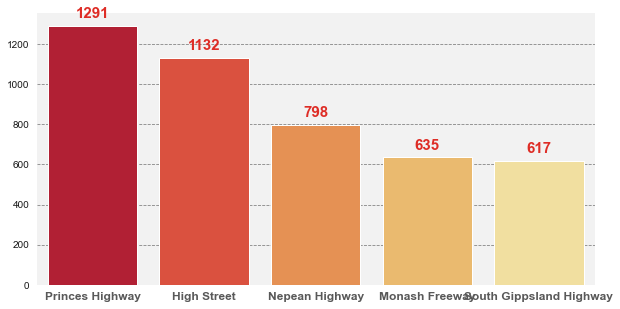

In [34]:
plt.figure(figsize=(10,5))
colour1 = sns.color_palette('YlOrRd_r', 5)
top_all = df_lga.road_01.value_counts(normalize=False)
top_all = top_all[:5]

top_all1 = sns.barplot(x= top_all.index, y=top_all.values, palette=colour1)
sns.despine(left=True, bottom=True)
top_all1.grid(axis='y')

top_all1.bar_label(top_all1.containers[0], fontsize=15, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
top_all1.set_xticklabels(xlabels, fontsize=12, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/top_all.png')
plt.show()

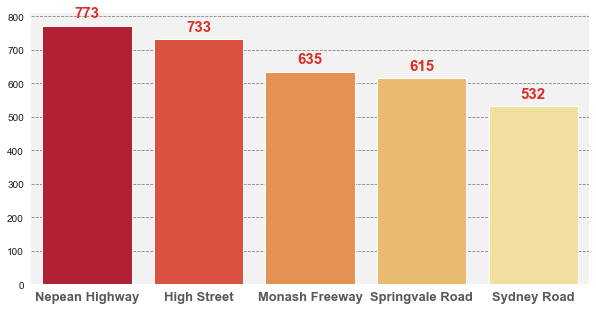

In [35]:
plt.figure(figsize=(10,5))
colour1 = sns.color_palette('YlOrRd_r', 5)
top_reg = heat_reg.road_01.value_counts(normalize=False)
top_reg = top_reg[:5]

top_reg1 = sns.barplot(x= top_reg.index, y=top_reg.values, palette=colour1)
sns.despine(left=True, bottom=True)
top_reg1.grid(axis='y')

top_reg1.bar_label(top_reg1.containers[0], fontsize=15, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
top_reg1.set_xticklabels(xlabels, fontsize=13, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/top_reg.png')
plt.show()

In [36]:
heat_mel = df_lga.loc[df_lga.lga == 'Melbourne']
heat_mel.head()

accident_no               road_01 type_01          road_02 type_02  \
20  T20150000057         Bourke Street  Street       Royal Lane    Lane   
30  T20150000093  Little Bourke Street  Street  Swanston Street  Street   
31  T20150000096         St Kilda Road    Road    Louise Street  Street   
34  T20150000101       Dryburgh Street  Street  Victoria Street  Street   
76  T20150000171            Dynon Road    Road     Lloyd Street  Street   

          lga           region sev_no   latitude   longitude  
20  Melbourne    Melbourne_Cbd      3 -37.813203  144.966752  
30  Melbourne    Melbourne_Cbd      3 -37.812545  144.965182  
31  Melbourne  Melbourne Urban      3 -37.843149  144.978065  
34  Melbourne  Melbourne Urban      3 -37.804488  144.943224  
76  Melbourne  Melbourne Urban      2 -37.802629  144.925000

In [37]:
topmel = heat_mel.road_01.value_counts()
topmel.head()

West Gate Freeway    177
Elizabeth Street     158
Collins Street       142
St Kilda Road        128
King Street          119
Name: road_01, dtype: int64

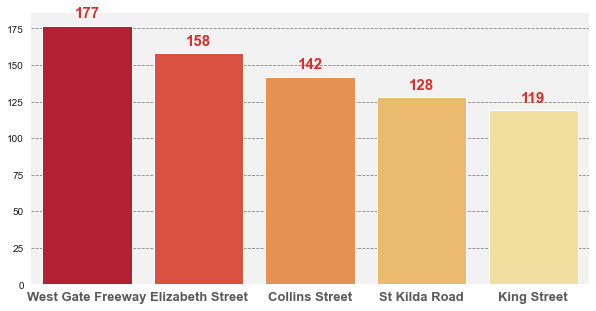

In [39]:
plt.figure(figsize=(10,5))
colour1 = sns.color_palette('YlOrRd_r', 5)
top_l = heat_mel.road_01.value_counts(normalize=False)
top_l = top_l[:5]

top_l1 = sns.barplot(x=top_l.index, y=top_l.values, palette=colour1)
sns.despine(left=True, bottom=True)
top_l1.grid(axis='y')

top_l1.bar_label(top_l1.containers[0], fontsize=15, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
top_l1.set_xticklabels(xlabels, fontsize=13, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/top_lga.png')
plt.show()

In [40]:
heat_cbd = df_lga.loc[df_lga.region == 'Melbourne_Cbd']
heat_cbd.head()

accident_no               road_01 type_01          road_02 type_02  \
20   T20150000057         Bourke Street  Street       Royal Lane    Lane   
30   T20150000093  Little Bourke Street  Street  Swanston Street  Street   
119  T20150000270        Collins Street  Street     Regent Place   Place   
132  T20150000299        Russell Street  Street    Portland Lane    Lane   
669  T20150001349         Flinders Lane    Lane     Queen Street  Street   

           lga         region sev_no   latitude   longitude  
20   Melbourne  Melbourne_Cbd      3 -37.813203  144.966752  
30   Melbourne  Melbourne_Cbd      3 -37.812545  144.965182  
119  Melbourne  Melbourne_Cbd      3 -37.815093  144.967902  
132  Melbourne  Melbourne_Cbd      3 -37.813370  144.968360  
669  Melbourne  Melbourne_Cbd      3 -37.817910  144.962029

In [41]:
topcbd = heat_cbd.road_01.value_counts()
topcbd.head()

Collins Street      125
Lonsdale Street      80
Elizabeth Street     64
Bourke Street        61
King Street          59
Name: road_01, dtype: int64

In [44]:
base_map2 = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

heat_mel = heat_mel[['latitude', 'longitude']]
heat_mel = heat_mel.dropna(axis=0, subset=['latitude', 'longitude'])
heat_mel = [[row['latitude'], row['longitude']] for index, row in heat_mel.iterrows()]

HeatMap(heat_mel).add_to(base_map2)

display(base_map2)

In [43]:
base_map3 = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

heat_all = df_lga[['latitude', 'longitude']]
heat_all = df_lga.dropna(axis=0, subset=['latitude', 'longitude'])
heat_all = [[row['latitude'], row['longitude']] for index, row in df_lga.iterrows()]

HeatMap(heat_all).add_to(base_map3)

display(base_map3)

## Year

In [45]:
df.head()

accident_no                          date     time time_desc  mon  year  \
0  T20150000004 1970-01-01 00:00:00.000042005  2:10:00     Night  Jan  2015   
1  T20150000005 1970-01-01 00:00:00.000042005  0:31:00     Night  Jan  2015   
2  T20150000008 1970-01-01 00:00:00.000042005  0:10:00     Night  Jan  2015   
3  T20150000011 1970-01-01 00:00:00.000042005  1:15:00     Night  Jan  2015   
4  T20150000014 1970-01-01 00:00:00.000042005  7:30:00   Morning  Jan  2015   

  e_no                event_type  day  no_veh  ...              rd_geom  \
0    2         Struck Pedestrian  Thu       1  ...  Not at intersection   
1    4  Collision : fixed object  Thu       1  ...  Not at intersection   
2    1        Collision: vehicle  Thu       2  ...  Not at intersection   
3    6        Vehicle overturned  Thu       1  ...  Not at intersection   
4    8              No collision  Thu       1  ...  Not at intersection   

   speed                  road_01          type_01           road_02 type_02  \
0     60        Mt Alexander Road             Road      South Street  Street   
1     50           The Boulevard         Boulevard     Kagoola Court   Court   
2    100             Andrews Road             Road       Mcewen Road    Road   
3    100  Cobden-Warrnambool Road             Road       Craigs Lane    Lane   
4    100    Murray Valley Highway  Highway/Freeway  North South Road    Road   

             lga             region   latitude   longitude  
0  Moonee Valley    Melbourne Urban -37.779229  144.930941  
1        Geelong  Large Prov Cities -38.095632  144.347208  
2     Shepparton     Rural Victoria -36.372313  145.035110  
3          Moyne     Rural Victoria -38.396728  142.753880  
4      Swan Hill     Rural Victoria -35.221766  143.458742  

[5 rows x 57 columns]

In [46]:
df_year = df[['accident_no', 'date', 'mon', 'year', 'day', 'time_desc', 'lga', 'region', 'sev_no']]

In [47]:
df_year.head()

accident_no                          date  mon  year  day time_desc  \
0  T20150000004 1970-01-01 00:00:00.000042005  Jan  2015  Thu     Night   
1  T20150000005 1970-01-01 00:00:00.000042005  Jan  2015  Thu     Night   
2  T20150000008 1970-01-01 00:00:00.000042005  Jan  2015  Thu     Night   
3  T20150000011 1970-01-01 00:00:00.000042005  Jan  2015  Thu     Night   
4  T20150000014 1970-01-01 00:00:00.000042005  Jan  2015  Thu   Morning   

             lga             region sev_no  
0  Moonee Valley    Melbourne Urban      3  
1        Geelong  Large Prov Cities      2  
2     Shepparton     Rural Victoria      1  
3          Moyne     Rural Victoria      2  
4      Swan Hill     Rural Victoria      3

In [48]:
df_year.dtypes

accident_no            object
date           datetime64[ns]
mon                    object
year                   object
day                    object
time_desc              object
lga                    object
region                 object
sev_no               category
dtype: object

C:\Users\Wendy\AppData\Local\Temp/ipykernel_17804/3805539631.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_year1.set_yticklabels(bar_year1.get_yticks(), size=10, color='#595959')


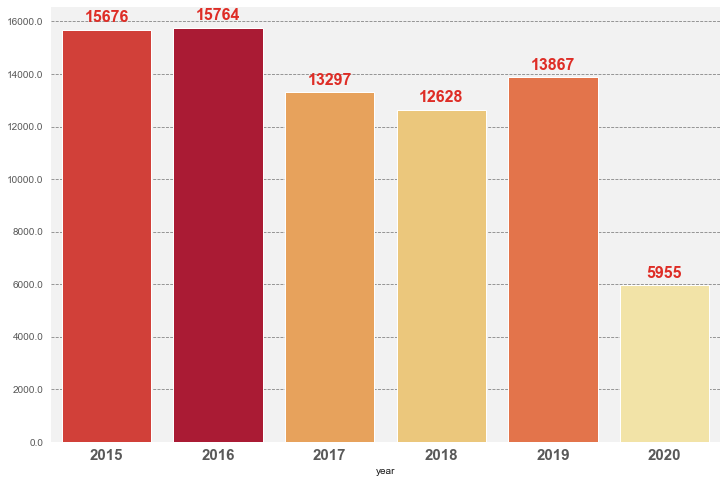

In [51]:
plt.figure(figsize=(12,8))

bar_year = df_year.groupby(df_year.year).size()
rank = df_year.groupby(df_year.year).size().rank().sub(1).astype(int)
colour2 = np.array(sns.color_palette('YlOrRd', len(rank)))[rank]

bar_year1 = sns.barplot(x= bar_year.index, y=bar_year.values, palette=colour2)
sns.despine(left=True, bottom=True)
bar_year1.grid(axis='y')

bar_year1.bar_label(bar_year1.containers[0], fontsize=16, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
bar_year1.set_xticklabels(xlabels, fontsize=15, fontweight='bold', color='#595959')
bar_year1.set_yticklabels(bar_year1.get_yticks(), size=10, color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/year.png')
plt.show()

C:\Users\Wendy\AppData\Local\Temp/ipykernel_17804/702583431.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_month1.set_yticklabels(bar_month1.get_yticks(), size=10, color='#595959')


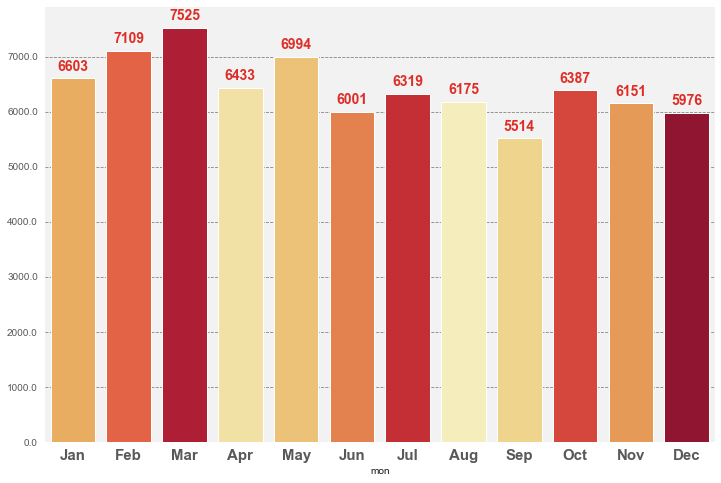

In [55]:
plt.figure(figsize=(12,8))

bar_month = df_year.groupby(df_year.mon).size()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rank1 = df_year.groupby(df_year.mon).size().rank().sub(1).astype(int)
colour3 = np.array(sns.color_palette('YlOrRd_r', len(rank1)))[rank1]

bar_month1 = sns.barplot(x= bar_month.index, y=bar_month.values, palette=colour3, order=month)
sns.despine(left=True, bottom=True)
bar_month1.grid(axis='y')

bar_month1.bar_label(bar_month1.containers[0], fontsize=14, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
bar_month1.set_xticklabels(xlabels, fontsize=15, fontweight='bold', color='#595959')
bar_month1.set_yticklabels(bar_month1.get_yticks(), size=10, color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/month.png')
plt.show()

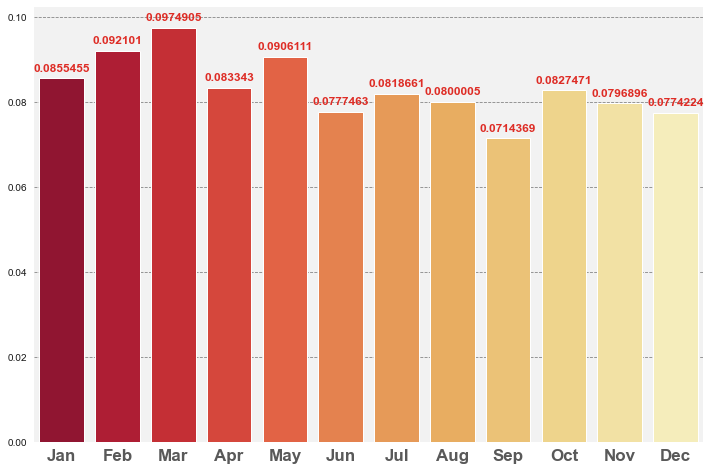

In [77]:
plt.figure(figsize=(12,8))
colour1 = sns.color_palette('YlOrRd_r', 12)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_1 = df_year.mon.value_counts(normalize=True)

month1 = sns.barplot(x=month_1.index, y=month_1.values, palette=colour1, order=order)
sns.despine(left=True, bottom=True)
month1.grid(axis='y')

month1.bar_label(month1.containers[0], fontsize=12, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
month1.set_xticklabels(xlabels, fontsize=17, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/month_sorted.png')
plt.show()

C:\Users\Wendy\AppData\Local\Temp/ipykernel_17804/15115810.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_day1.set_yticklabels(bar_day1.get_yticks(), size=10, color='#595959')


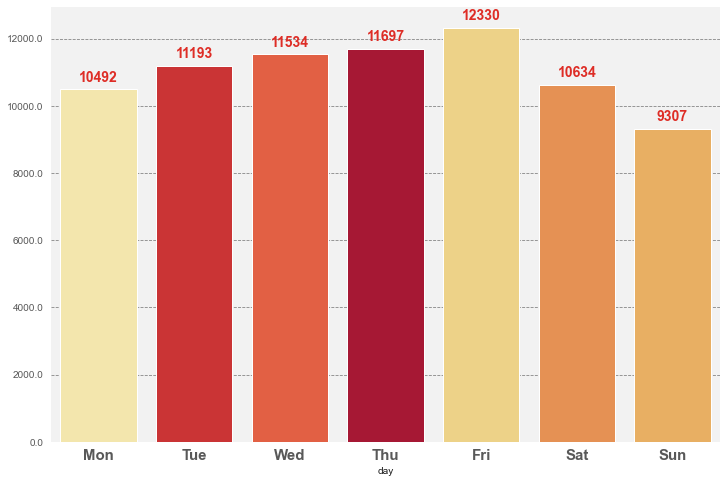

In [57]:
plt.figure(figsize=(12,8))

bar_day = df_year.groupby(df_year.day).size()
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
rank2 = df_year.groupby(df_year.day).size().rank().sub(1).astype(int)
colour4 = np.array(sns.color_palette('YlOrRd_r', len(rank2)))[rank2]

bar_day1 = sns.barplot(x= bar_day.index, y=bar_day.values, palette=colour4, order=day)
sns.despine(left=True, bottom=True)
bar_day1.grid(axis='y')

bar_day1.bar_label(bar_day1.containers[0], fontsize=14, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
bar_day1.set_xticklabels(xlabels, fontsize=15, fontweight='bold', color='#595959')
bar_day1.set_yticklabels(bar_day1.get_yticks(), size=10, color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/day.png')
plt.show()

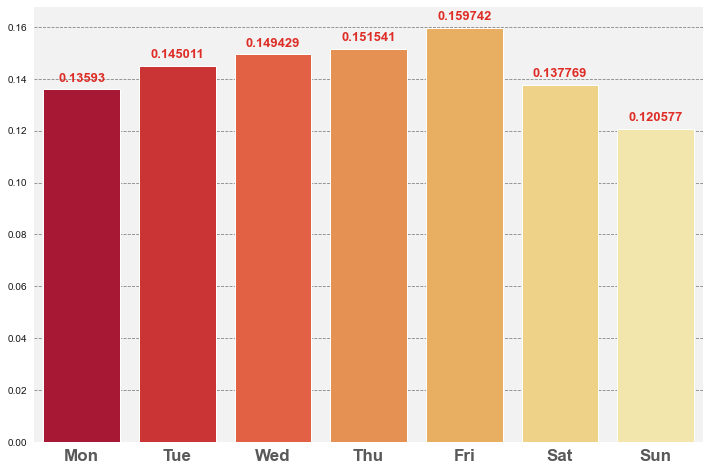

In [59]:
plt.figure(figsize=(12,8))
colour4 = sns.color_palette('YlOrRd_r', 7)
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_1 = df_year.day.value_counts(normalize=True)

day1 = sns.barplot(x=day_1.index, y=day_1.values, palette=colour4, order=day)
sns.despine(left=True, bottom=True)
day1.grid(axis='y')

day1.bar_label(day1.containers[0], fontsize=13, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
day1.set_xticklabels(xlabels, fontsize=17, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/day_sorted.png')
plt.show()

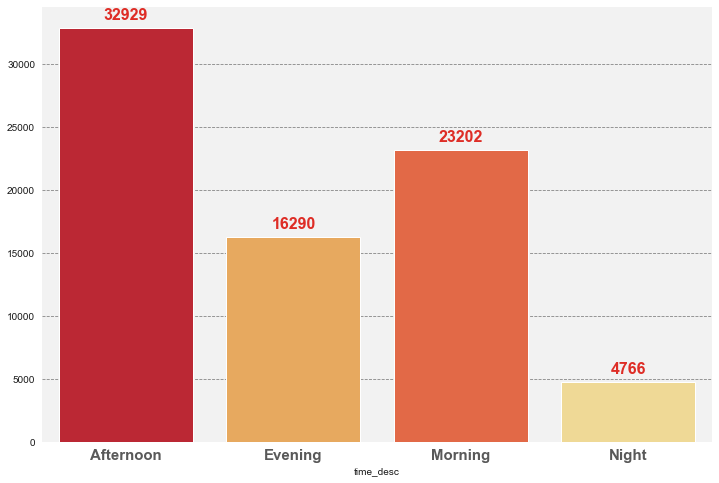

In [60]:
plt.figure(figsize=(12,8))

bar_time = df_year.groupby(df_year.time_desc).size()
rank4 = df_year.groupby(df_year.time_desc).size().rank().sub(1).astype(int)
colour6 = np.array(sns.color_palette('YlOrRd', len(rank4)))[rank4]

bar_time1 = sns.barplot(x= bar_time.index, y=bar_time.values, palette=colour6)
sns.despine(left=True, bottom=True)
bar_time1.grid(axis='y')

bar_time1.bar_label(bar_time1.containers[0], fontsize=16, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
bar_time1.set_xticklabels(xlabels, fontsize=15, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/time.png')
plt.show()

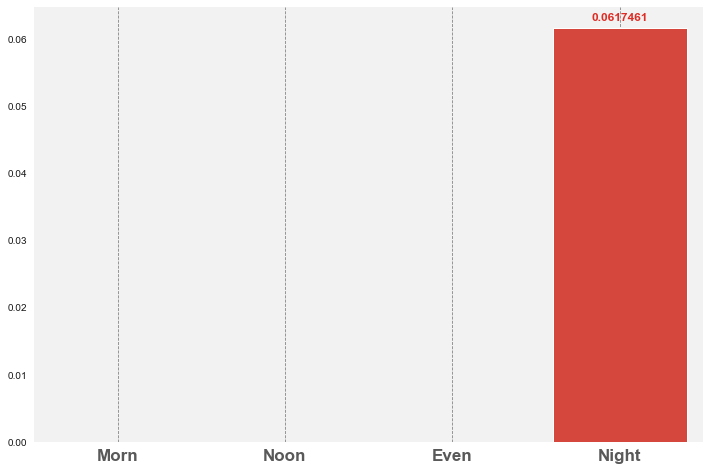

In [62]:
plt.figure(figsize=(12,8))
colour7 = sns.color_palette('YlOrRd_r', 12)
order = ['Morn', 'Noon', 'Even', 'Night']
time_1 = df_year.time_desc.value_counts(normalize=True)

time1 = sns.barplot(x=time_1.index, y=time_1.values, palette=colour7, order=order)
sns.despine(left=True, bottom=True)
time1.grid(axis='x')

time1.bar_label(time1.containers[0], fontsize=12, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
time1.set_xticklabels(xlabels, fontsize=17, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/month_sorted.png')
plt.show()

In [63]:
time_1

Afternoon    0.426613
Morning      0.300595
Evening      0.211046
Night        0.061746
Name: time_desc, dtype: float64

In [64]:
df_t = df[['day', 'speed', 'sev_no', 'fatal', 'ser_inj', 'no_per', 'no_veh']]

In [65]:
df_t.head()

day speed sev_no  fatal  ser_inj  no_per  no_veh
0  Thu    60      3      0        0       2       1
1  Thu    50      2      0        1       2       1
2  Thu   100      1      1        1       2       2
3  Thu   100      2      0        1       1       1
4  Thu   100      3      0        0       1       1

In [66]:
df_t.dtypes

day          object
speed      category
sev_no     category
fatal         int64
ser_inj       int64
no_per        int64
no_veh        int64
dtype: object

In [67]:
df_t = df_t.astype({'speed' : 'int64', 'sev_no' : 'int64'})

In [68]:
df_t.dtypes

day        object
speed       int64
sev_no      int64
fatal       int64
ser_inj     int64
no_per      int64
no_veh      int64
dtype: object

C:\Users\Wendy\AppData\Local\Temp/ipykernel_17804/1747684804.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_day.set_yticklabels(box_day.get_yticks(), size=14, color='#595959')


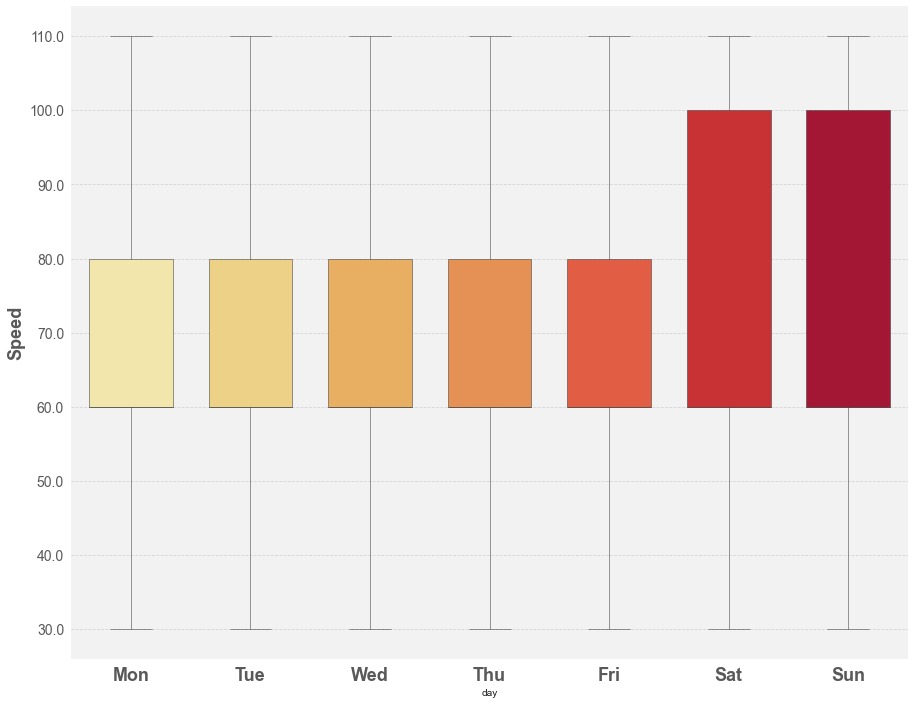

In [69]:
plt.figure(figsize=(15,12))
colour = sns.color_palette('YlOrRd', 7)
day1 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

box_day = sns.boxplot(x= 'day', y= 'speed', data=df_t, showfliers=False, palette=colour, width=.7, 
                      order=day1,  capprops=dict(linewidth=.5), whiskerprops=dict(linewidth=0.5), linewidth=.5)
sns.despine(left=True, bottom=True)

box_day.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
_, xlabels = plt.xticks()
box_day.set_xticklabels(xlabels, fontsize=18, fontweight='bold', color='#595959')
box_day.set_yticklabels(box_day.get_yticks(), size=14, color='#595959')
box_day.grid(axis='y', color='lightgrey')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/day_speed.png')
plt.show()

In [70]:
df = df.astype({'sev_no' : 'int64'})

In [71]:
df.dtypes

accident_no            object
date           datetime64[ns]
time                   object
time_desc              object
mon                    object
year                   object
e_no                 category
event_type             object
day                    object
no_veh                  int64
no_per                  int64
ser_inj                 int64
oth_inj                 int64
fatal                   int64
no_inj                  int64
sev_no                  int64
fem                     int64
male                    int64
0-15                    int64
16-30                   int64
31-45                   int64
46-60                   int64
61-75                   int64
75+                     int64
bicy                    int64
driv                    int64
mcyc                    int64
pass                    int64
ped                     int64
pi_p                    int64
rid                     int64
o_dri                   int64
y_dri                   int64
f_dri     

C:\Users\Wendy\AppData\Local\Temp/ipykernel_17804/1139955214.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_sev.set_yticklabels(box_sev.get_yticks(), size=14, color='#595959')


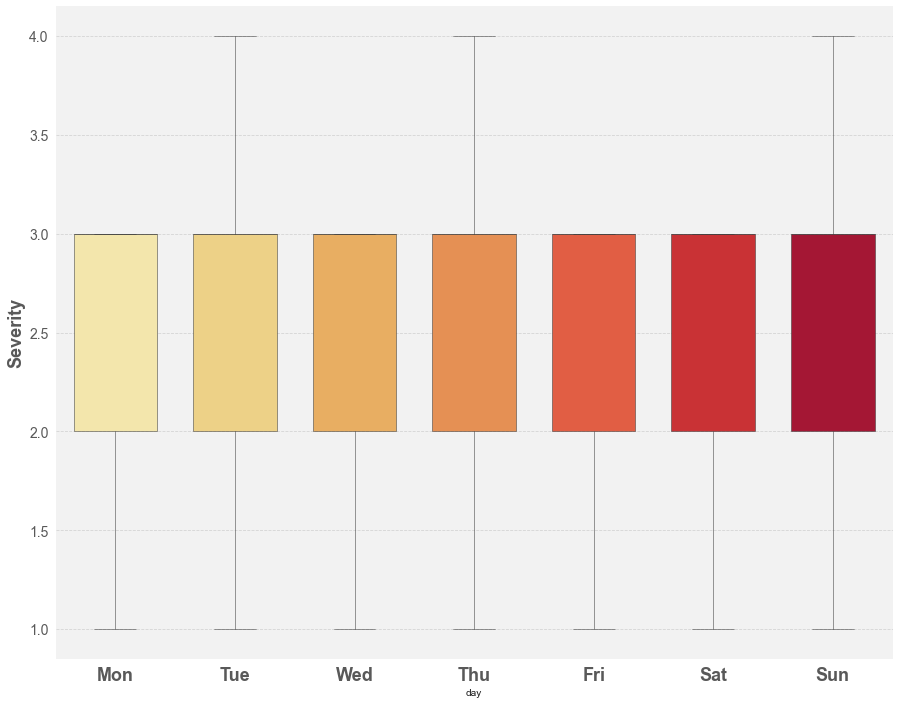

In [73]:
plt.figure(figsize=(15,12))
colour = sns.color_palette('YlOrRd', 7)
day2 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

box_sev = sns.boxplot(x= 'day', y= 'sev_no', data=df_t, showfliers=False, palette=colour, width=.7, 
                      order=day1,  capprops=dict(linewidth=.5), whiskerprops=dict(linewidth=0.5), linewidth=.5)
sns.despine(left=True, bottom=True)

box_sev.set_ylabel('Severity',fontsize = 18, fontweight='bold', color='#595959')
_, xlabels = plt.xticks()
box_sev.set_xticklabels(xlabels, fontsize=18, fontweight='bold', color='#595959')
box_sev.set_yticklabels(box_sev.get_yticks(), size=14, color='#595959')
box_sev.grid(axis='y', color='lightgrey')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/day_sev.png')
plt.show()

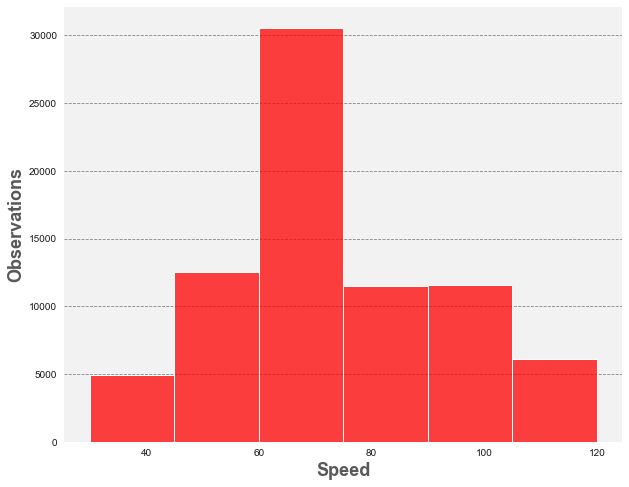

In [74]:
plt.figure(figsize=(10,8))
hist_speed = sns.histplot(np.clip(df_t.speed, 30, 120), bins=6, color='red')
sns.despine(left=True, bottom=True)

hist_speed.set_xlabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
hist_speed.set_ylabel('Observations',fontsize = 18, fontweight='bold', color='#595959')
hist_speed.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/speed_hist.png')
plt.show()

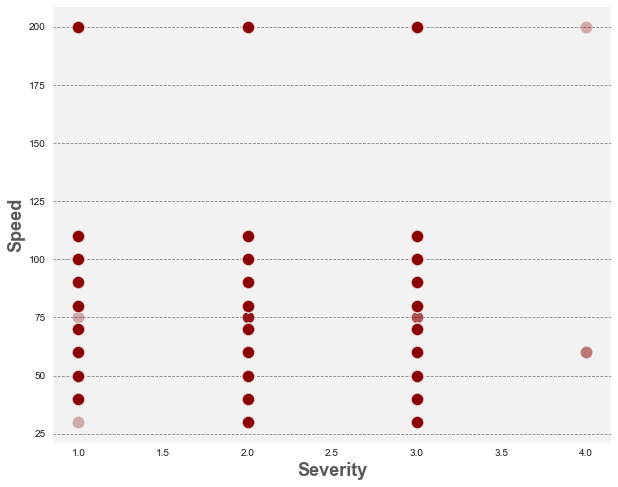

In [75]:
plt.figure(figsize=(10,8))
scat_sev = sns.scatterplot(data=df_t, x='sev_no', y=np.clip(df_t.speed, 30, 200), s=150, color='darkred', alpha=.3)
sns.despine(left=True, bottom=True)

scat_sev.set_xlabel('Severity',fontsize = 18, fontweight='bold', color='#595959')
scat_sev.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
scat_sev.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/sev_scat.png')
plt.show()

In [554]:
df_fat = df_t.loc[(df_t.fatal>=1)]
df_fat.head()

day  speed  sev_no  fatal  ser_inj  no_per  no_veh
2    Thu    100       1      1        1       2       2
6    Thu     70       1      1        0       1       1
115  Mon    100       1      1        0       3       2
178  Wed    100       1      1        4       5       2
313  Sat     50       1      1        0       1       1

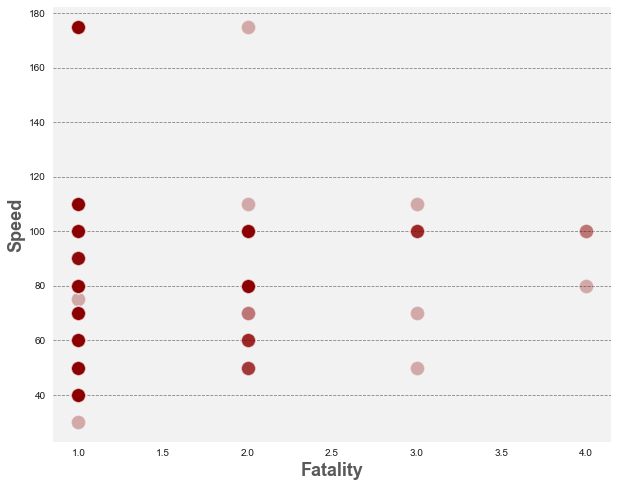

In [674]:
plt.figure(figsize=(10,8))
scat_fat = sns.scatterplot(data=df_fat, x='fatal', y=np.clip(df_fat.speed, 30, 175), s=200, color='darkred', alpha=.3)
sns.despine(left=True, bottom=True)

scat_fat.set_xlabel('Fatality',fontsize = 18, fontweight='bold', color='#595959')
scat_fat.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
scat_fat.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/fatal_scat.png')
plt.show()

In [561]:
df_inj = df_t.loc[(df_t.ser_inj>=1)]
df_inj.head()

day  speed  sev_no  fatal  ser_inj  no_per  no_veh
1  Thu     50       2      0        1       2       1
2  Thu    100       1      1        1       2       2
3  Thu    100       2      0        1       1       1
5  Thu     70       2      0        1       2       2
7  Thu    999       2      0        1       1       1

In [564]:
df_inj.ser_inj.value_counts()

1     19205
2      1710
3       363
4        99
5        40
6         9
7         6
8         5
11        1
10        1
17        1
Name: ser_inj, dtype: int64

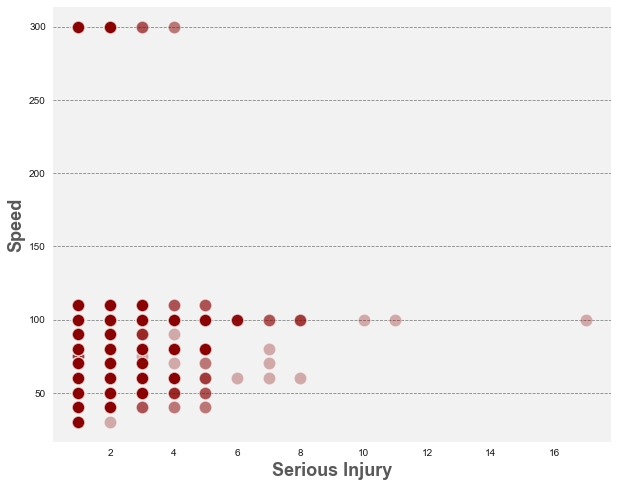

In [664]:
plt.figure(figsize=(10,8))
scat_inj = sns.scatterplot(data=df_inj, x='ser_inj', y=np.clip(df_inj.speed, 30, 300), s=150, color='darkred', alpha=.3)
sns.despine(left=True, bottom=True)

scat_inj.set_xlabel('Serious Injury',fontsize = 18, fontweight='bold', color='#595959')
scat_inj.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
scat_inj.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/inj_scat.png')
plt.show()

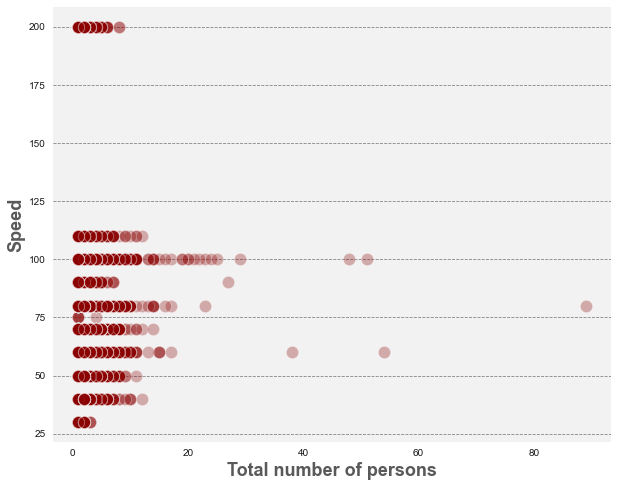

In [665]:
plt.figure(figsize=(10,8))
scat_peo = sns.scatterplot(data=df_t, x='no_per', y=np.clip(df_inj.speed, 30, 200), s=150, color='darkred', alpha=.3)
sns.despine(left=True, bottom=True)

scat_peo.set_xlabel('Total number of persons',fontsize = 18, fontweight='bold', color='#595959')
scat_peo.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
scat_peo.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/people_scat.png')
plt.show()

In [596]:
df['tot_inj'] = df.fatal + df.

In [597]:
df.columns

Index(['accident_no', 'date', 'mon', 'year', 'e_no', 'event_type', 'day',
       'no_veh', 'no_per', 'ser_inj', 'oth_inj', 'fatal', 'no_inj', 'sev_no',
       'fem', 'male', '0-15', '16-30', '31-45', '46-60', '61-75', '75+',
       'bicy', 'driv', 'mcyc', 'pass', 'ped', 'pi_p', 'rid', 'o_dri', 'y_dri',
       'f_dri', 'm_dri', 'o_fd', 'o_md', 'y_fd', 'y_md', '2-whe', 'h_veh',
       'horse', 'm_pass', 'l_pass', 'unk', 'ute', 'rg_no', 'rd_geom', 'speed',
       'road_01', 'type_01', 'road_02', 'type_02', 'lga', 'region', 'latitude',
       'longitude', 'tot_inj'],
      dtype='object')

In [601]:
new_inj = df[['fatal', 'ser_inj', 'tot_inj', 'speed', 'no_per', 'no_veh', 'sev_no']]

In [602]:
new_inj.head()

fatal  ser_inj  tot_inj speed  no_per  no_veh sev_no
0      0        0        0    60       2       1      3
1      0        1        1    50       2       1      2
2      1        1        2   100       2       2      1
3      0        1        1   100       1       1      2
4      0        0        0   100       1       1      3

In [603]:
df_to_inj = new_inj.loc[new_inj.tot_inj>=1]

In [605]:
df_to_inj.head()

fatal  ser_inj  tot_inj speed  no_per  no_veh sev_no
1      0        1        1    50       2       1      2
2      1        1        2   100       2       2      1
3      0        1        1   100       1       1      2
5      0        1        1    70       2       2      2
6      1        0        1    70       1       1      1

In [639]:
df_to_inj.dtypes

fatal         int64
ser_inj       int64
tot_inj       int64
speed      category
no_per        int64
no_veh        int64
sev_no     category
dtype: object

In [640]:
df_to_inj = df_to_inj.astype({'speed' : 'int64', 'sev_no' : 'int64'})

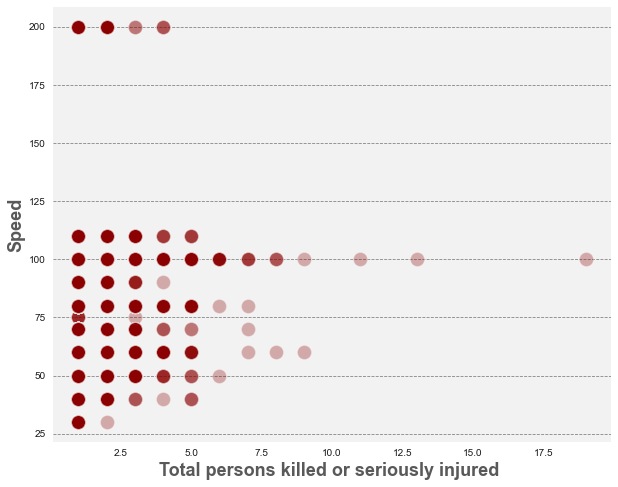

In [641]:
plt.figure(figsize=(10,8))
scat_tot = sns.scatterplot(data=df_to_inj, x='tot_inj', y=np.clip(df_to_inj.speed, 30, 200), s=200, color='darkred', alpha=.3)
sns.despine(left=True, bottom=True)

scat_tot.set_xlabel('Total persons killed or seriously injured ',fontsize = 18, fontweight='bold', color='#595959')
scat_tot.set_ylabel('Speed',fontsize = 18, fontweight='bold', color='#595959')
scat_tot.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/totinj_scat.png')
plt.show()

In [250]:
mel_urb = df.loc[df.lga == 'Melbourne']

In [251]:
mel_urb.head()

accident_no                          date      time  time_desc  mon  \
20  T20150000057 1970-01-01 00:00:00.000042005   4:47:00      Night  Jan   
30  T20150000093 1970-01-01 00:00:00.000042006  12:05:00  Afternoon  Jan   
31  T20150000096 1970-01-01 00:00:00.000042006  16:55:00  Afternoon  Jan   
34  T20150000101 1970-01-01 00:00:00.000042006  17:28:00  Afternoon  Jan   
76  T20150000171 1970-01-01 00:00:00.000042007  22:15:00    Evening  Jan   

    year e_no          event_type  day  no_veh  ...              rd_geom  \
20  2015    2   Struck Pedestrian  Thu       1  ...       T intersection   
30  2015    8        No collision  Fri       2  ...   Cross intersection   
31  2015    1  Collision: vehicle  Fri       2  ...  Not at intersection   
34  2015    1  Collision: vehicle  Fri       2  ...   Cross intersection   
76  2015    2   Struck Pedestrian  Sat       1  ...  Not at intersection   

    speed               road_01  type_01          road_02  type_02        lga  \
20    999         Bourke Street   Street       Royal Lane     Lane  Melbourne   
30     60  Little Bourke Street   Street  Swanston Street   Street  Melbourne   
31     60         St Kilda Road     Road    Louise Street   Street  Melbourne   
34     60       Dryburgh Street   Street  Victoria Street   Street  Melbourne   
76     70            Dynon Road     Road     Lloyd Street   Street  Melbourne   

             region   latitude   longitude  
20    Melbourne_Cbd -37.813203  144.966752  
30    Melbourne_Cbd -37.812545  144.965182  
31  Melbourne Urban -37.843149  144.978065  
34  Melbourne Urban -37.804488  144.943224  
76  Melbourne Urban -37.802629  144.925000  

[5 rows x 57 columns]

In [252]:
mel_d = mel_urb.day.value_counts()
mel_d

Thu    756
Wed    691
Fri    661
Tue    629
Mon    535
Sat    501
Sun    422
Name: day, dtype: int64

In [253]:
mel_t = mel_urb.time_desc.value_counts()
mel_t

Afternoon    1527
Morning      1369
Evening      1014
Night         285
Name: time_desc, dtype: int64

In [254]:
mel_s = mel_urb.sev_no.value_counts()
mel_s

3    3165
2    1015
1      15
Name: sev_no, dtype: int64

In [231]:
prin_high = df.loc[df.road_01 == 'Princes Highway']
prin_high.head()

accident_no                          date      time  time_desc  mon  \
53   T20150000136 1970-01-01 00:00:00.000042007   8:18:00    Morning  Jan   
59   T20150000150 1970-01-01 00:00:00.000042006  15:20:00  Afternoon  Jan   
74   T20150000168 1970-01-01 00:00:00.000042007  16:47:00  Afternoon  Jan   
115  T20150000262 1970-01-01 00:00:00.000042009  14:35:00  Afternoon  Jan   
191  T20150000414 1970-01-01 00:00:00.000042011  19:10:00    Evening  Jan   

     year e_no                event_type  day  no_veh  ...  \
53   2015    1        Collision: vehicle  Sat       2  ...   
59   2015    1        Collision: vehicle  Fri       2  ...   
74   2015    1        Collision: vehicle  Sat       2  ...   
115  2015    1        Collision: vehicle  Mon       2  ...   
191  2015    4  Collision : fixed object  Wed       1  ...   

                 rd_geom  speed          road_01          type_01  \
53    Cross intersection     80  Princes Highway  Highway/Freeway   
59    Cross intersection     80  Princes Highway  Highway/Freeway   
74    Cross intersection    100  Princes Highway  Highway/Freeway   
115  Not at intersection    100  Princes Highway  Highway/Freeway   
191  Not at intersection    100  Princes Highway  Highway/Freeway   

                  road_02 type_02             lga           region   latitude  \
53   Belgrave-Hallam Road    Road           Casey  Melbourne Urban -38.006255   
59            Webb Street  Street           Casey  Melbourne Urban -38.025246   
74          Jennings Lane    Lane  East Gippsland   Rural Victoria -37.822769   
115      Great Ocean Road    Road           Moyne   Rural Victoria -38.384522   
191        Garabaldi Lane    Lane           Moyne   Rural Victoria -38.384864   

      longitude  
53   145.273345  
59   145.305293  
74   147.681202  
115  142.619320  
191  142.587190  

[5 rows x 57 columns]

In [256]:
prin_d = prin_high.day.value_counts()
prin_t = prin_high.time_desc.value_counts()
prin_s = prin_high.sev_no.value_counts()

In [257]:
prin_d

Fri    240
Tue    196
Thu    194
Wed    189
Sat    171
Mon    161
Sun    140
Name: day, dtype: int64

In [258]:
prin_t

Afternoon    564
Morning      361
Evening      277
Night         89
Name: time_desc, dtype: int64

In [259]:
prin_s

3    848
2    409
1     34
4      0
Name: sev_no, dtype: int64

In [235]:
nep_high = df.loc[df.road_01 == 'Nepean Highway']
nep_high.head()

accident_no                          date      time  time_desc  mon  \
25   T20150000075 1970-01-01 00:00:00.000042006  12:05:00  Afternoon  Jan   
81   T20150000182 1970-01-01 00:00:00.000042008   7:45:00    Morning  Jan   
153  T20150000345 1970-01-01 00:00:00.000042010  16:25:00  Afternoon  Jan   
268  T20150000566 1970-01-01 00:00:00.000042013  16:56:00  Afternoon  Jan   
404  T20150000836 1970-01-01 00:00:00.000042017  11:30:00    Morning  Jan   

     year e_no                event_type  day  no_veh  ...  \
25   2015    1        Collision: vehicle  Fri       3  ...   
81   2015    4  Collision : fixed object  Sun       1  ...   
153  2015    1        Collision: vehicle  Tue       3  ...   
268  2015    4  Collision : fixed object  Fri       1  ...   
404  2015    1        Collision: vehicle  Tue       2  ...   

                   rd_geom  speed         road_01          type_01  \
25   Multiple intersection     80  Nepean Highway  Highway/Freeway   
81      Cross intersection     80  Nepean Highway  Highway/Freeway   
153    Not at intersection     60  Nepean Highway  Highway/Freeway   
268         T intersection     60  Nepean Highway  Highway/Freeway   
404    Not at intersection     80  Nepean Highway  Highway/Freeway   

              road_02 type_02        lga           region   latitude  \
25         Bay Street  Street    Bayside  Melbourne Urban -37.906369   
81        Centre Road    Road    Bayside  Melbourne Urban -37.915897   
153  Mcculloch Avenue  Avenue  Frankston  Melbourne Urban -38.123070   
268      Natal Avenue  Avenue   Kingston  Melbourne Urban -38.034920   
404     Rusden Street  Street  Glen Eira  Melbourne Urban -37.886027   

      longitude  
25   145.008726  
81   145.018118  
153  145.124619  
268  145.106364  
404  144.999085  

[5 rows x 57 columns]

In [260]:
nep_d = nep_high.day.value_counts()
nep_t = nep_high.time_desc.value_counts()
nep_s = nep_high.sev_no.value_counts()

In [237]:
nep_d

Fri    123
Sat    120
Thu    120
Wed    113
Tue    112
Mon    109
Sun    101
Name: day, dtype: int64

In [261]:
nep_s

3    532
2    256
1     10
4      0
Name: sev_no, dtype: int64

In [238]:
nep_t

Afternoon    360
Morning      249
Evening      146
Night         43
Name: time_desc, dtype: int64

In [262]:
west_gate = df.loc[df.road_01 == 'West Gate Freeway']
west_gate.head()

accident_no                          date      time  time_desc  mon  \
177  T20150000391 1970-01-01 00:00:00.000042011  13:20:00  Afternoon  Jan   
280  T20150000592 1970-01-01 00:00:00.000042013  19:25:00    Evening  Jan   
328  T20150000689 1970-01-01 00:00:00.000042015  12:40:00  Afternoon  Jan   
554  T20150001133 1970-01-01 00:00:00.000042019  22:20:00    Evening  Jan   
724  T20150001452 1970-01-01 00:00:00.000042025   6:40:00    Morning  Jan   

     year e_no          event_type  day  no_veh  ...              rd_geom  \
177  2015    1  Collision: vehicle  Wed       4  ...  Not at intersection   
280  2015    1  Collision: vehicle  Fri       2  ...  Not at intersection   
328  2015    1  Collision: vehicle  Sun       2  ...  Not at intersection   
554  2015    1  Collision: vehicle  Thu       2  ...  Not at intersection   
724  2015    1  Collision: vehicle  Wed       2  ...  Not at intersection   

     speed            road_01          type_01                        road_02  \
177    100  West Gate Freeway  Highway/Freeway  Millers-West Gate Out On Ramp   
280     80  West Gate Freeway  Highway/Freeway                   Moray Street   
328     80  West Gate Freeway  Highway/Freeway                  Ingles Street   
554     80  West Gate Freeway  Highway/Freeway                 Douglas Parade   
724     80  West Gate Freeway  Highway/Freeway                    Hyde Street   

     type_02          lga           region   latitude   longitude  
177     Ramp  Hobsons Bay  Melbourne Urban -37.825484  144.840781  
280   Street    Melbourne  Melbourne Urban -37.827704  144.961272  
328   Street    Melbourne  Melbourne Urban -37.825614  144.936870  
554   Parade    Melbourne  Melbourne Urban -37.830560  144.899750  
724   Street    Melbourne  Melbourne Urban -37.829611  144.898529  

[5 rows x 57 columns]

In [263]:
west_d = west_gate.day.value_counts()
west_t = west_gate.time_desc.value_counts()
west_s = west_gate.sev_no.value_counts()

In [241]:
west_d

Wed    59
Thu    54
Fri    52
Sat    49
Tue    48
Mon    41
Sun    28
Name: day, dtype: int64

In [264]:
west_s

3    241
2     88
1      2
Name: sev_no, dtype: int64

In [242]:
west_t

Afternoon    133
Morning       94
Evening       82
Night         22
Name: time_desc, dtype: int64

<AxesSubplot:>

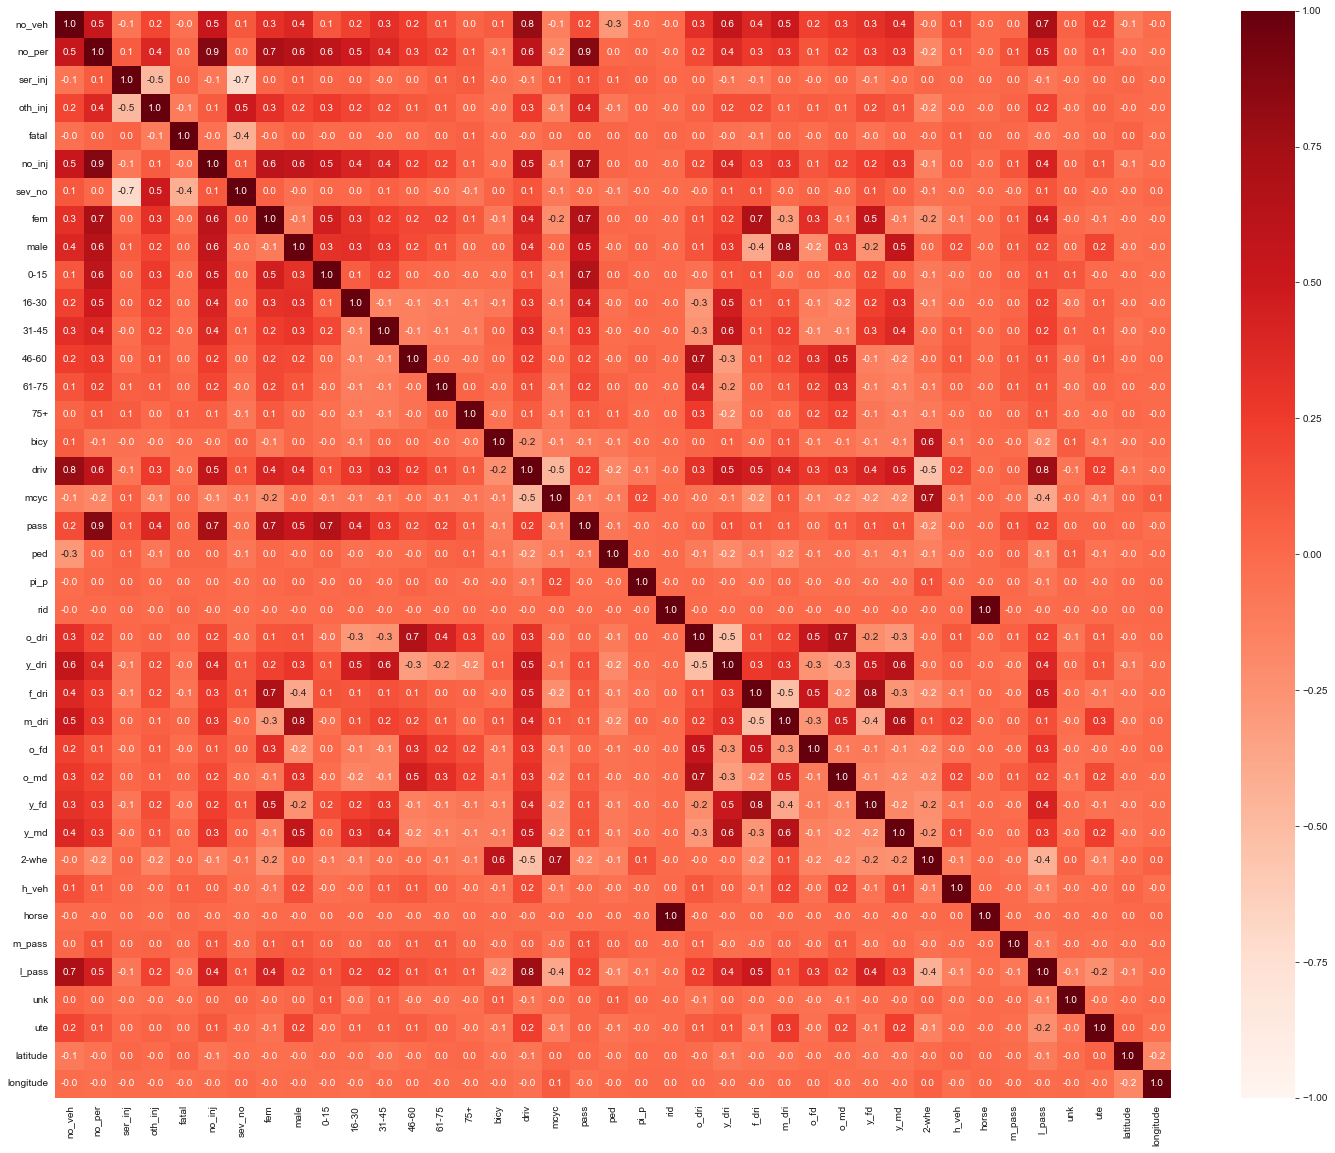

In [76]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.1f', vmin=-1, vmax=1)

In [269]:
df_new = df.filter(['accident_no', 'no_per', 'ser_inj', 'oth_inj', 'fatal', 'sev_no', 'fem' 'male','bicy', 'mcyc', 
                     'driv', 'pass', 'ped', 'pi_p', 'rid', 'o_dri', 'y_dri'])

In [271]:
df_new.head()

accident_no  no_per  ser_inj  oth_inj  fatal  sev_no  bicy  mcyc  driv  \
0  T20150000004       2        0        1      0       3     0     0     1   
1  T20150000005       2        1        1      0       2     0     0     1   
2  T20150000008       2        1        0      1       1     0     2     0   
3  T20150000011       1        1        0      0       2     0     0     1   
4  T20150000014       1        0        1      0       3     0     0     1   

   pass  ped  pi_p  rid  o_dri  y_dri  
0     0    1     0    0      0      1  
1     1    0     0    0      1      0  
2     0    0     0    0      0      2  
3     0    0     0    0      1      0  
4     0    0     0    0      0      1

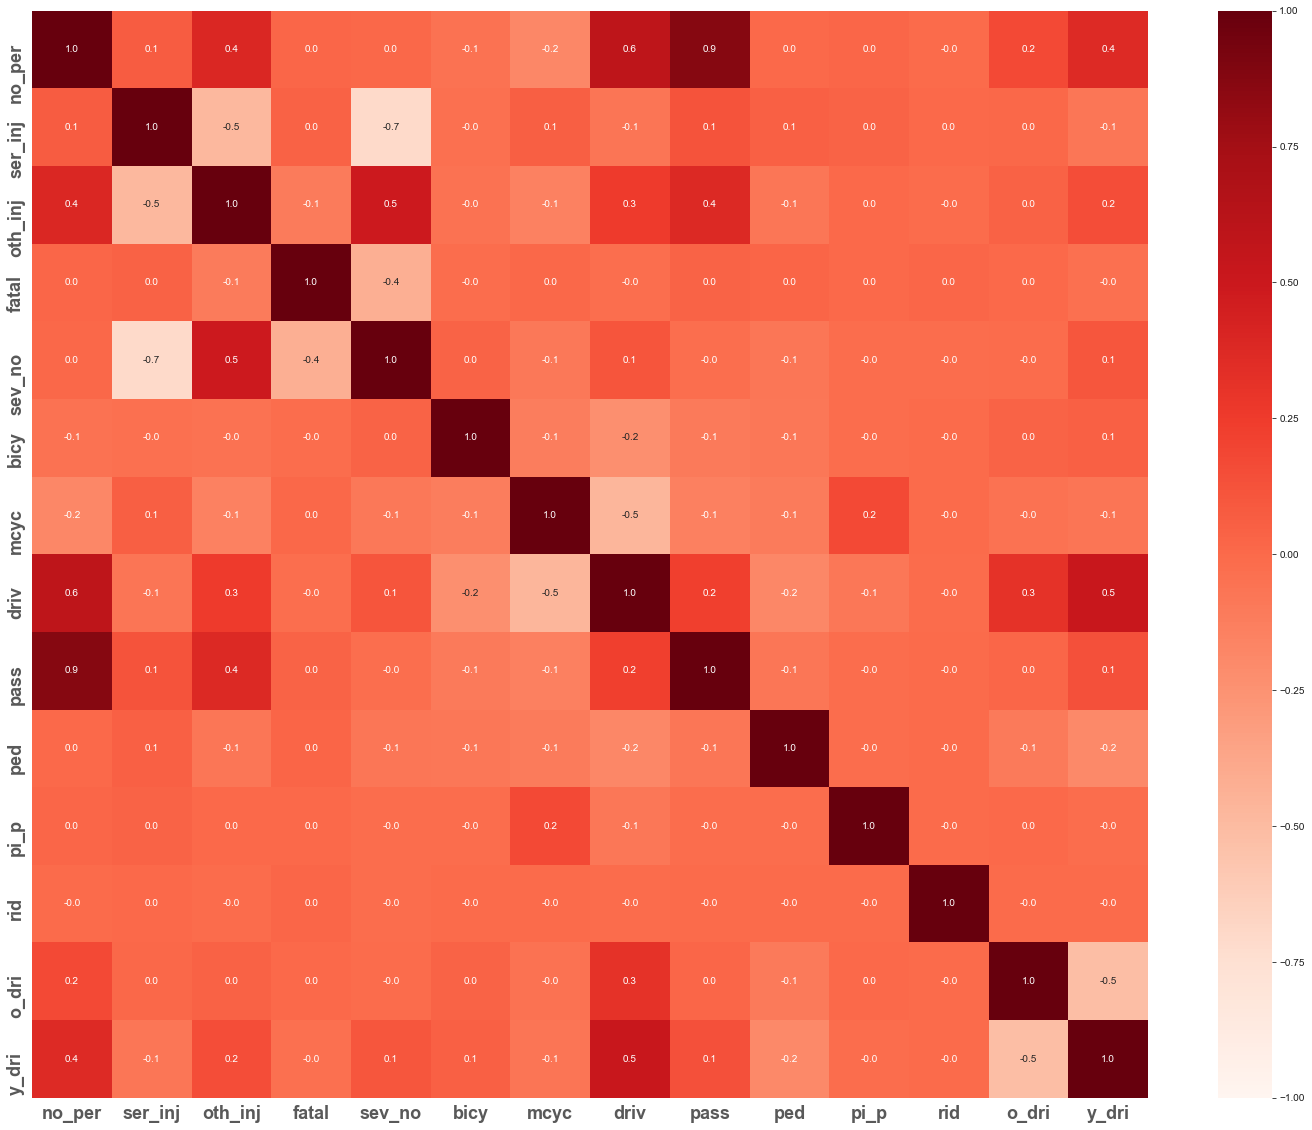

In [275]:
plt.figure(figsize=(25,20))
corr_f = sns.heatmap(df_new.corr(), cmap='Reds', annot=True, fmt='.1f', vmin=-1, vmax=1)

_, xlabels = plt.xticks()
corr_f.set_xticklabels(xlabels, fontsize=18, fontweight='bold', color='#595959')
_, ylabels = plt.yticks()
corr_f.set_yticklabels(ylabels, fontsize=18, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/corr.png')
plt.show()